# Neural Network - 영화리뷰 분류

In [1]:
from keras import optimizers
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print (train_labels[0])

1


In [5]:
print (max([max(sequence) for sequence in train_data]))

9999


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print (decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [19]:
# 정수 시퀀스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [40]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# 16은 은닉 유닛의 개수
model.add(layers.Dense(1, activation='sigmoid'))
# 신경망의 출력이 확률이므로 네트워크의 마지막에 시그모이드 활성화함수를 사용
# 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택

In [41]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [44]:
# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [45]:
# 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킴
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 2s 40ms/step - loss: 0.5044 - acc: 0.7926 - val_loss: 0.3785 - val_acc: 0.8715
Epoch 2/50
30/30 [==============================] - 1s 33ms/step - loss: 0.2995 - acc: 0.9074 - val_loss: 0.3043 - val_acc: 0.8875
Epoch 3/50
30/30 [==============================] - 1s 32ms/step - loss: 0.2223 - acc: 0.9287 - val_loss: 0.2784 - val_acc: 0.8909
Epoch 4/50
30/30 [==============================] - 1s 32ms/step - loss: 0.1760 - acc: 0.9428 - val_loss: 0.2748 - val_acc: 0.8904
Epoch 5/50
30/30 [==============================] - 1s 31ms/step - loss: 0.1419 - acc: 0.9563 - val_loss: 0.3051 - val_acc: 0.8788
Epoch 6/50
30/30 [==============================] - 1s 32ms/step - loss: 0.1185 - acc: 0.9647 - val_loss: 0.3076 - val_acc: 0.8805
Epoch 7/50
30/30 [==============================] - 1s 33ms/step - loss: 0.0985 - acc: 0.9695 - val_loss: 0.3281 - val_acc: 0.8784
Epoch 8/50
30/30 [==============================] - 1s 33ms/step - loss: 0.0806 - a

In [46]:
# model.fit() 메서드는 History 객체를 반환
# 훈련하는 동안 발생한 모든 정보
를 담고 있는 딕셔너리인 history 속성을 가지고 있음
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

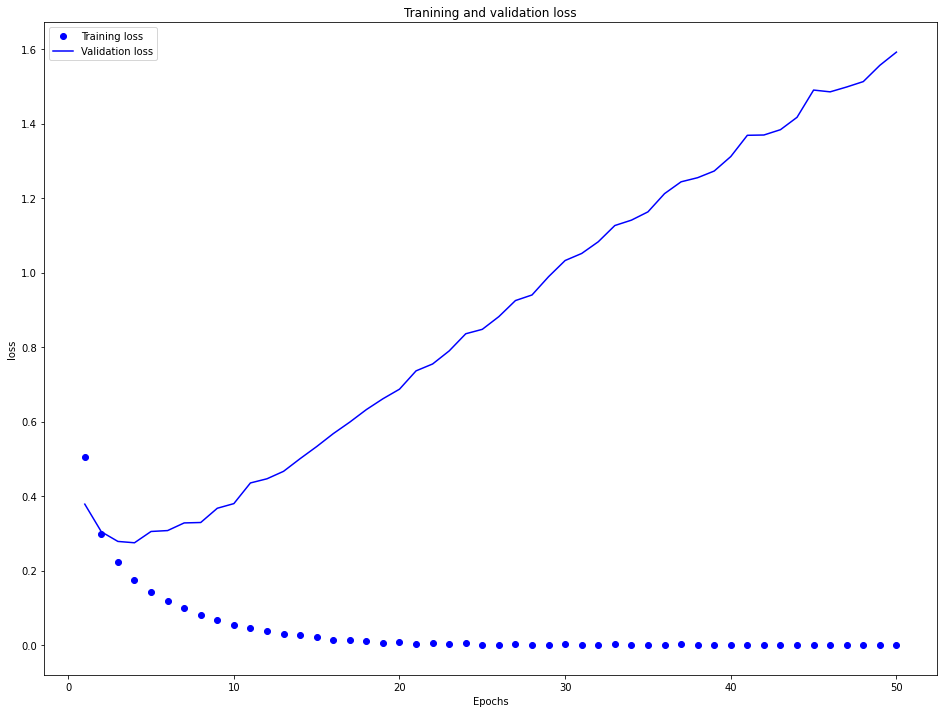

In [47]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Tranining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

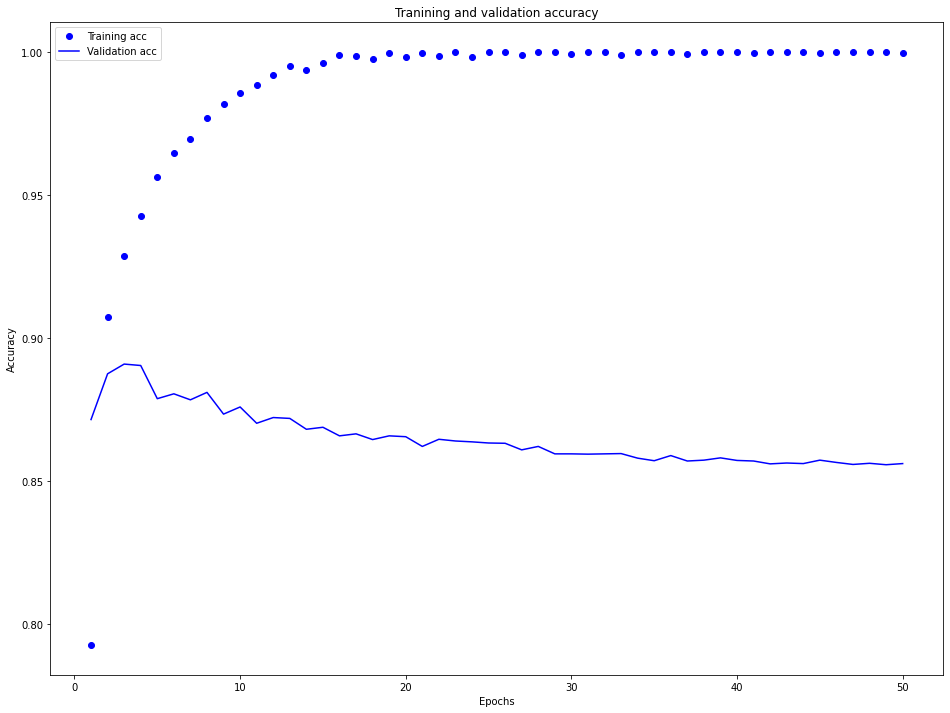

In [48]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Tranining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
# 과대적합을 방지하기 위해 세번째 에포크 이후에 훈련을 중지할 수 있음
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4429 - accuracy: 0.8212
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2521 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1973 - accuracy: 0.9300
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3011 - accuracy: 0.8812
[0.3010518550872803, 0.8812000155448914]


In [50]:
# 훈련된 모델로 새로운 데이터에 대해 예측
model.predict(x_test)

array([[0.18557888],
       [0.99986064],
       [0.6697271 ],
       ...,
       [0.09848785],
       [0.05327734],
       [0.4863258 ]], dtype=float32)